In [1]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

In [5]:
def find_nanowell(BF_img,opening):
    # area range of a square/nanowell 
    min_area = 30000.0
    max_area = 70000.0
    # final segmented nanowell size: nanowell_size=height=width
    nanowell_size=248
    # adjust coordinates of identified nanowells
    offset_x=-10
    offset_y=-10
    # find all nanowells in a restricted region
    xMin,xMax=200,8400 
    yMin,yMax=200,8400 

    # get all contours. Only the outer contours will be returned. 
    cnts = cv2.findContours(opening, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]
    image_number = 0 # nanowell counts

    fig, ax = plt.subplots(figsize=(10, 10))
    centroidsBF=[]
    half_size = nanowell_size // 2
    for c in cnts:
        area = cv2.contourArea(c)
        if area > min_area and area < max_area:
            # compute the center of the contour
            M = cv2.moments(c)
            x = int(M["m10"] / M["m00"])+offset_x
            y = int(M["m01"] / M["m00"])+offset_y
            if xMin<x<xMax and yMin<y<yMax:
                centroidsBF.append((x,y))
                # visulaize segmented nanowells
                square = plt.Rectangle((x - half_size, y - half_size), nanowell_size, nanowell_size, 
                                    fill=False, edgecolor='red',linewidth=0.5)
                image_number+=1
                ax.add_patch(square)

    ax.imshow(BF_img,cmap='gray')
    print('total=',image_number)
    plt.show()
    return centroidsBF

def crop_squares(image, centroids, square_size, save_path):
    
    for i in range(len(centroids)):
        x, y = centroids[i]
        
        # Calculate the top-left corner of the square
        top_left_x = int(x - square_size / 2)
        top_left_y = int(y - square_size / 2)
        
        # Crop the square
        square = image[top_left_y:top_left_y+square_size, top_left_x:top_left_x+square_size]

        square_save=save_path+'_'+str(i)+'.jpg'
        cv2.imwrite(square_save,square)   

total= 909


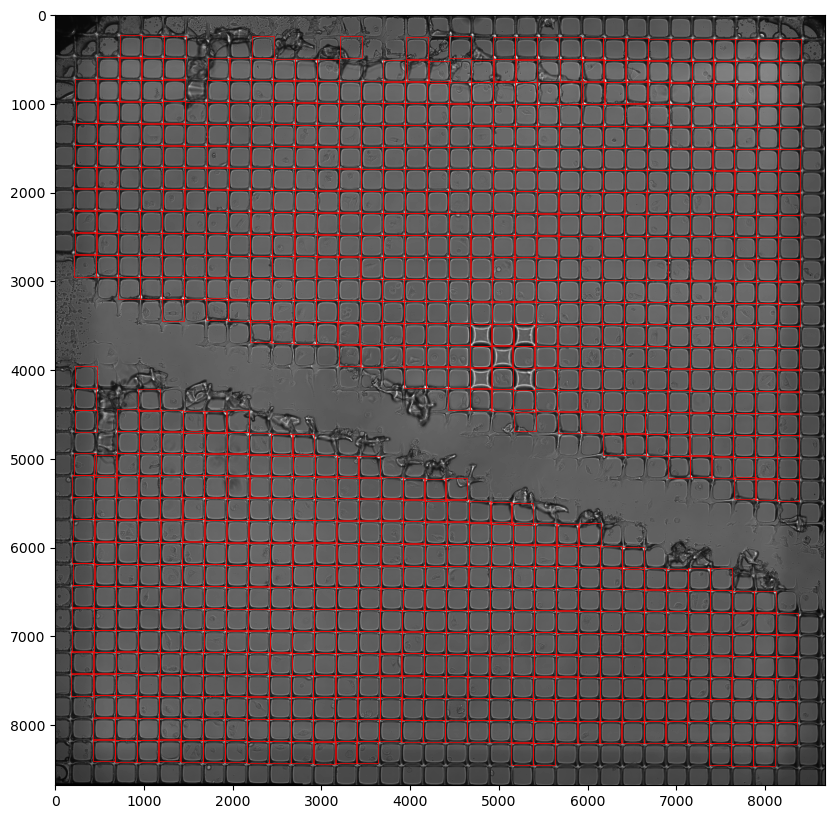

In [8]:
# load an image
img_path='C:/Users/Pan/Desktop/0905/example2.tif'
save_path='xxxx' # save segmented nanowells
img=cv2.imread(img_path)
BF_img=cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  

### image preprocessing-------------------------------------------------------------------
ret, threshold = cv2.threshold(BF_img.copy(), 0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
# Creates a 4x4 rectangular structuring element for morphological operations
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (4,4))
# close small holes inside the foreground objects or small black points on the object.
close = cv2.morphologyEx(threshold, cv2.MORPH_CLOSE, kernel, iterations=2)
kernel2 = cv2.getStructuringElement(cv2.MORPH_RECT, (40,40))
# remove small objects (it's good for removing noise)
opening = cv2.morphologyEx(close, cv2.MORPH_OPEN, kernel2)

centroidsBF=find_nanowell(BF_img,opening)
#crop_squares(BF_img, centroidsBF, 248, save_path )
